# <center>Понижение размерности<center>
>**Задача снижения размерности** — это задача преобразования данных с целью уменьшения количества признаков, которые описывают объект.

Методы снижения размерности могут преобразовывать данные двумя способами:
* линейно,
* нелинейно.
## <center>PCA<center>
>Метод главных компонент, или **PCA (Principal Components Analysis)** — это один из базовых способов уменьшения размерности.

Данный метод имеет широкое применение:

* Подавление шума на изображениях.

    Изображение состоит из пикселей, которые можно рассматривать как набор точек в многомерном пространстве. С помощью метода снижения размерности PCA можно преобразовать этот набор точек и оставить только первые компоненты, полученные после преобразования. В этих компонентах будет содержаться основная информация об изображении, но не будет шума. Таким образом мы улучшим качество изображения.

    Качество картинки с шумом и без него:

    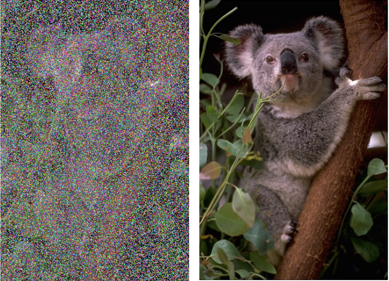
* Индексация видео для быстрого поиска по базе.

    Каждый кадр видео можно преобразовать с помощью PCA и представить несколькими значениями. Далее эти значения легко хранить и искать в базе.

Для уменьшения размерности метод главных компонент проводит линейное преобразование пространства, которое сохраняет длины векторов. Таким образом происходит отображение признаков в новое пространство с меньшей размерностью.

В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

**Первой главной компонентой** будет называться первая ось в новом пространстве.

Ось PC1 проходит через максимальную дисперсию данных и является суммой исходных осей, а ось PC2 является разницей двух исходных осей, перпендикулярна первой оси и тоже проходит через максимальную оставшуюся дисперсию:

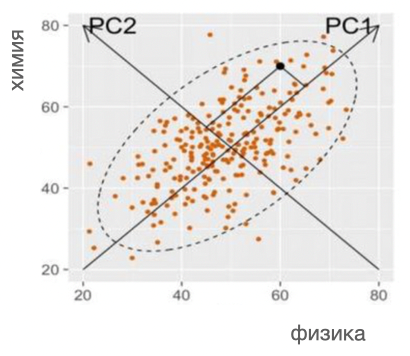

Таким образом, мы получили первую главную компоненту и вторую компоненту. При этом первая компонента несёт в себе максимум информации о данных, а в каждой последующей компоненте информации всё меньше.



# <center>T-SNE<center>

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет **t-SNE (t-distributed Stochastic Neighbor Embedding)**, что переводится с английского как **«стохастическое вложение соседей с t-распределением»**. 

*t-SNE*, в отличие от *PCA*, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Если у нас есть такое распределение точек, как на графике ниже,

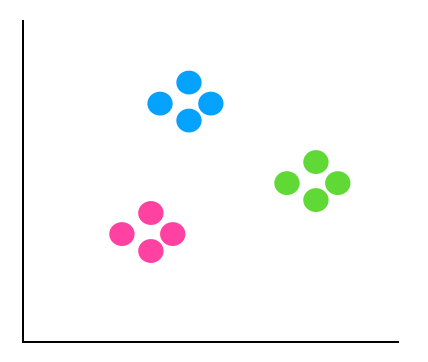

то, казалось бы, чтобы уменьшить размерность данных, нужно просто спроецировать эти точки на ось x:

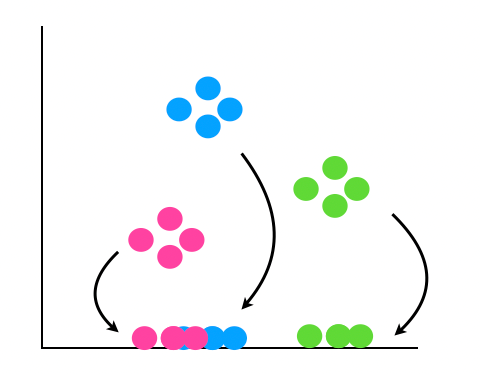

Но, как мы видим, розовый и синий кластеры перестают быть различными кластерами, когда мы проецируем данные на ось X — данные перемешались. t-SNE позволяет не допускать такого.

**Алгоритм состоит из следующих шагов:**
1. В исходном многомерном пространстве для каждого объекта из датасета рассчитываем евклидово расстояние между объектами. Далее с помощью нормального распределения попарно сравниваем объекты датасета. На основе этих значений строится матрица, которая содержит значения схожести объектов:

    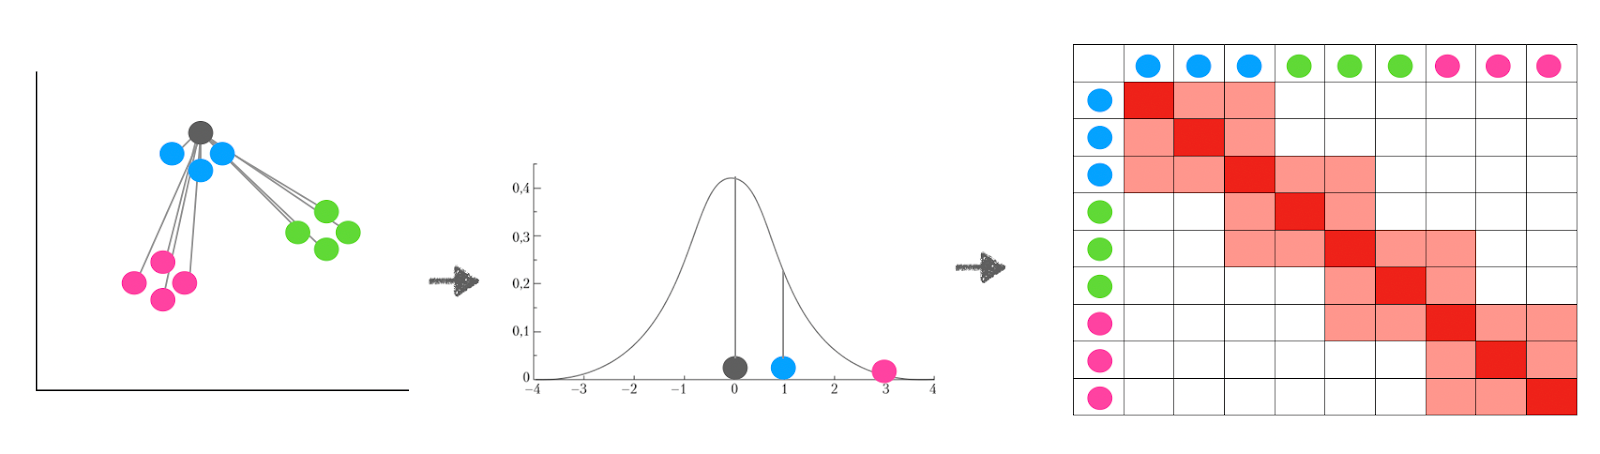
2. На втором шаге мы уменьшаем размерность данных. Здесь мы случайным образом проецируем объекты из двухмерного пространства на ось x. Далее, как и на первом шаге, мы считаем схожесть объектов в новом пространстве, но для подсчёта используем не нормальное распределение, а **t-распределение**. После этого строим матрицу попарной схожести объектов:

    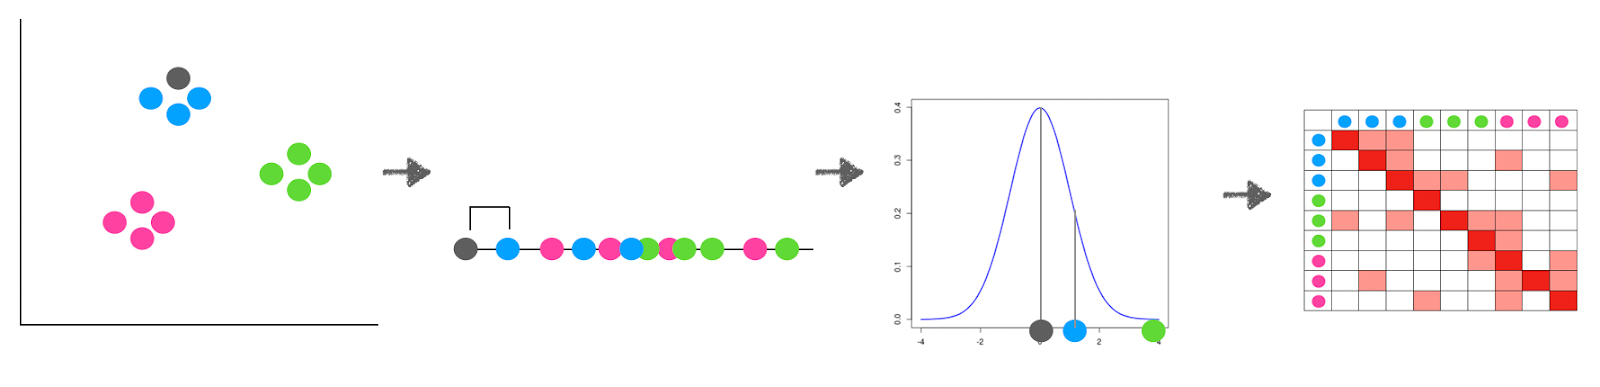
3. Далее необходимо создать новую матрицу сходства, которая будет похожа на исходную:

    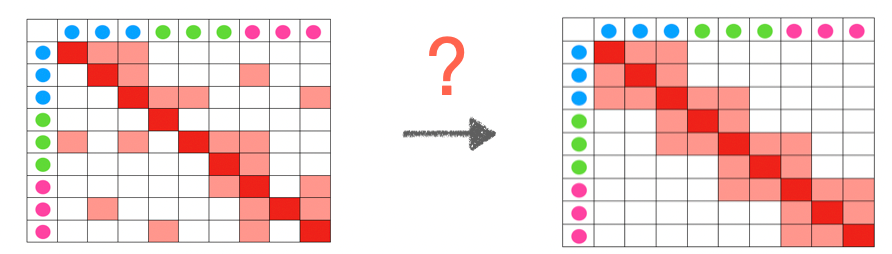

    С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдалённых:

    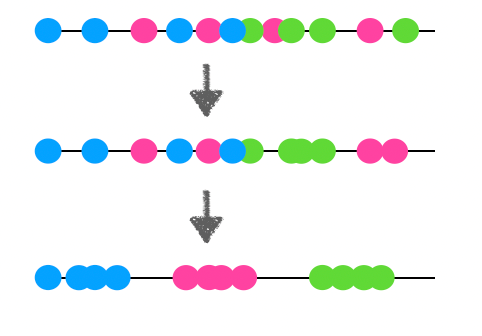

    Таким образом, мы итеративно приходим к разделению объектов в новом пространстве.

Работа алгоритма выглядит так:

На первой итерации данные расположены хаотично, но с каждой итерацией похожие объекты подходят ближе друг к другу, а непохожие отдаляются друг от друга.

![](https://lms.skillfactory.ru/assets/courseware/v1/0da4bbbb194a28ddeca93cac17e674a7/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_12.gif)

||PCA|T-SNE|
|---|---|---|
|**Преобразование, которое используется для снижения размерности**| Линейное | Нелинейное |
|**Кейсы использования**|Уменьшение размерности данных с целью их дальнейшего использования в ML-моделях|Визуализация многомерного пространства|
|**Вызов в sklearn**|```from sklearn.decomposition import PCA```|```from sklearn.manifold import TSNE```|